# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Открываем файл с данными и изучаем общую информацию. 

In [1]:
import pandas as pd
import numpy as np #Будем округлять
import matplotlib.pyplot as plt
import seaborn

In [2]:
data = pd.read_csv('real_estate_data.csv')
print(data.head())

  total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0  20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...                                                                                                                                                                                                                                                                  
1  7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...                                                                                                                                                                                                                                                                  
2  10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...               

Данные склеились, так как в файле и при разделении колонок и используется знак табуляции. Исправим это с помощью параметра sep.

Изучим общую информацию о полученном датафрейме.

In [3]:
data = pd.read_csv('real_estate_data.csv', sep='\t')
data.head(pd.set_option('display.max_columns', None))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Построим гистограмму для всех числовых столбцов таблицы на одном графике.

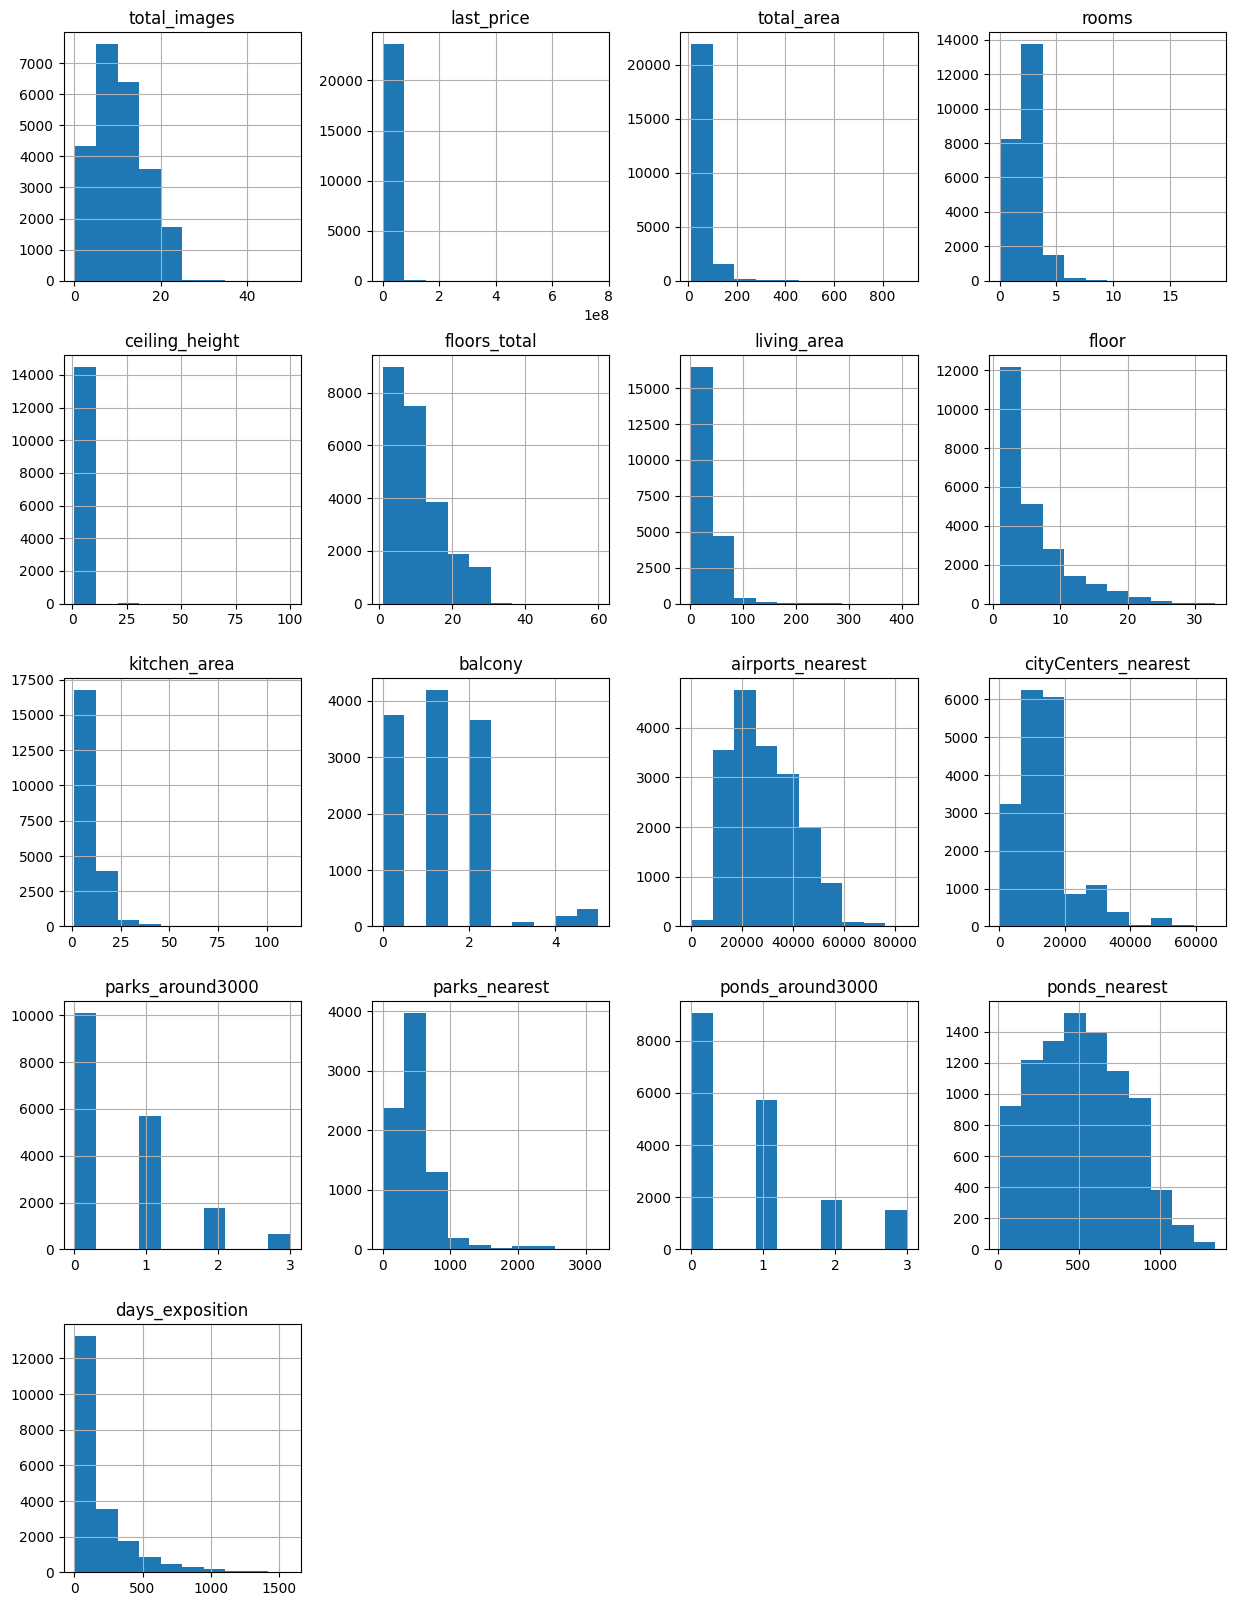

In [5]:
data.hist(figsize=(15, 20));

Я открыл файл, изучил его, вывел превые строки, построил гистограммы.

Данные в файле склеелись. Исправил.

## Предобработка данных

### Найдем и изучим пропущенные значения в столбцах

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пропуски в столбце с балконом скорее всего связаны с тем, что при заполнении пользователи не указывали отсуттсвие балкона когда его нет. Пропуски заменим на 0. 

Пропуски в столбцах floors_total (86 шт), living_area (1903 шт), kitchen_area (2278 шт), ceiling_height (9195 шт), locality_name (49 шт) допущены по вине пользователей. Удалять их не будем, чтобы сохранить достаточный объем данных для исследований.

В столбце is_apartment 20924 пропуска - пропуски, как и false, значат, что недвижимость не является аппартоментами. Заменим на false.

Пропуски в столбцах airports_nearest (5542 шт), cityCenters_nearest (5519 шт), parks_around300 (5518 шт), parks_nearest (15620 шт), ponds_around3000 (5518 шт), ponds_nearest (14589 шт) допущены по техническим причинами и еще помимо этого возможно в столбцах ponds_nearest и parks_nearest пропуски в строчках в случае удаленности объектов более, чем например 3 км.

Предполагаю, что по пропуски в столбце days_exposition (3181 шт) связаны с тем, что объявления еще не сняты с продажи.

Заполним пропуски в столбцах balcony и is_apartment 

In [7]:
data.loc[(data['balcony'].isna()), 'balcony'] = 0
data.loc[(data['is_apartment'].isna()), 'is_apartment'] = False

### Рассмотрим типы данных в каждом столбце

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [9]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['is_apartment'] = data['is_apartment'].astype('bool')

Приобразуем значения в столбце first_day_exposition в понятные для Python даты.

Для экономии памяти в  столбце is_apartment преобразуем в булевые значения.

### Изучим уникальные значения в столбце locality_name

In [10]:
my_list = data['locality_name'].sort_values().unique()
for item in my_list:
    print(f"[{item}]")

[Бокситогорск]
[Волосово]
[Волхов]
[Всеволожск]
[Выборг]
[Высоцк]
[Гатчина]
[Зеленогорск]
[Ивангород]
[Каменногорск]
[Кингисепп]
[Кириши]
[Кировск]
[Колпино]
[Коммунар]
[Красное Село]
[Кронштадт]
[Кудрово]
[Лодейное Поле]
[Ломоносов]
[Луга]
[Любань]
[Мурино]
[Никольское]
[Новая Ладога]
[Отрадное]
[Павловск]
[Петергоф]
[Пикалёво]
[Подпорожье]
[Приморск]
[Приозерск]
[Пушкин]
[Санкт-Петербург]
[Светогорск]
[Сертолово]
[Сестрорецк]
[Сланцы]
[Сосновый Бор]
[Сясьстрой]
[Тихвин]
[Тосно]
[Шлиссельбург]
[городской поселок Большая Ижора]
[городской поселок Янино-1]
[городской посёлок Будогощь]
[городской посёлок Виллози]
[городской посёлок Лесогорский]
[городской посёлок Мга]
[городской посёлок Назия]
[городской посёлок Новоселье]
[городской посёлок Павлово]
[городской посёлок Рощино]
[городской посёлок Свирьстрой]
[городской посёлок Советский]
[городской посёлок Фёдоровское]
[городской посёлок Янино-1]
[деревня Агалатово]
[деревня Аро]
[деревня Батово]
[деревня Бегуницы]
[деревня Белогорка]
[де

В столбце есть неявные дубликаты - это связано с формой населенного пункта(нп). Названия нп уникальны. Добавим столбец, где мелкие нп переменуем в "нп". И еще раз проверим уникальность.

In [11]:
data['locality_name_new'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['городской поселок', 'коттеджный поселок', 'поселок городского типа', 'поселок при железнодорожной станции',
             'поселок станции', 'деревня', 'поселок', 'поселок имени', 'садоводческое некоммерческое товарищество',
             'садовое товарищество', 'село'], 'нп.', regex=True)
    ) 
my_list = data['locality_name_new'].sort_values().unique()
for item in my_list:
    print(f"[{item}]")

[Бокситогорск]
[Волосово]
[Волхов]
[Всеволожск]
[Выборг]
[Высоцк]
[Гатчина]
[Зеленогорск]
[Ивангород]
[Каменногорск]
[Кингисепп]
[Кириши]
[Кировск]
[Колпино]
[Коммунар]
[Красное Село]
[Кронштадт]
[Кудрово]
[Лодейное Поле]
[Ломоносов]
[Луга]
[Любань]
[Мурино]
[Никольское]
[Новая Ладога]
[Отрадное]
[Павловск]
[Петергоф]
[Пикалево]
[Подпорожье]
[Приморск]
[Приозерск]
[Пушкин]
[Санкт-Петербург]
[Светогорск]
[Сертолово]
[Сестрорецк]
[Сланцы]
[Сосновый Бор]
[Сясьстрой]
[Тихвин]
[Тосно]
[Шлиссельбург]
[нп. Агалатово]
[нп. Александровская]
[нп. Алексеевка]
[нп. Аннино]
[нп. Аро]
[нп. Барышево]
[нп. Батово]
[нп. Бегуницы]
[нп. Белогорка]
[нп. Белоостров]
[нп. Большая Вруда]
[нп. Большая Ижора]
[нп. Большая Пустомержа]
[нп. Большие Колпаны]
[нп. Большое Рейзино]
[нп. Большой Сабск]
[нп. Бор]
[нп. Борисова Грива]
[нп. Бугры]
[нп. Будогощь]
[нп. Ваганово]
[нп. Важины]
[нп. Вартемяги]
[нп. Вахнова Кара]
[нп. Вещево]
[нп. Виллози]
[нп. Вознесенье]
[нп. Возрождение]
[нп. Войсковицы]
[нп. Войскорово]


Я определил в каких столбцах пропушены значения, по возможности заполнил. 

Значения пропущены по вине пользователей(не всю информацию указываю) и данные полученые автоматически на основе картографических данных не полные. 

Предполагаю, что по пропуски в столбце days_exposition связаны с тем, что объявления еще не сняты с продажи. 

Часть данных удалось востоновить в столбцах balcony и is_apartment. 

Приобразовал значения в столбце first_day_exposition в понятные для Python даты и для экономии памяти в столбце is_apartment преобразовал в булевые значения. 

В столбце locality_name устранил неявные дубликаты - это связано с формой населенного пункта.

## Добавим в таблицу новые столбцы

<b>Цена одного квадратного метра

In [12]:
data['price_per_meter'] = np.round((data['last_price'] / data['total_area']), decimals = 2)

<b>День недели публикации объявления 

In [13]:
data['weekday'] = data['first_day_exposition'].dt.weekday

<b>Месяц публикации объявления

In [14]:
data['month'] = data['first_day_exposition'].dt.month

<b>Год публикации объявления

In [15]:
data['year'] = data['first_day_exposition'].dt.year

<b>Тип этажа квартиры (значения — «первый», «последний», «другой»)

In [16]:
def categorize_floor(data):
    if data['floor'] == 1:
        return 'первый'
    if data['floor'] == data['floors_total']:
        return 'последний'
    if data['floor'] > data['floors_total']:
        return 'ошибка'
    return 'другой'
data['floor_type'] = data.apply(categorize_floor, axis=1)
data['floor_type'].unique()

array(['другой', 'первый', 'последний'], dtype=object)

<b>Расстояние до центра города в километрах

Расстояние до центра города в километрах

Посчитал и добавил в таблицу:
* цена одного квадратного метра;
* день публикации объявления (0 - понедельник, 1 - вторник и т.д.);
* месяц публикации объявления;
* год публикации объявления;
* тип этажа квартиры (значения — «первый», «последний», «другой»);
* расстояние в км до центра города.
* Расстояние до центра города округлил.

## Проведите исследовательский анализ данных

### Изучим параметры объектов и постройте отдельные гистограммы. 

<b>Общая площадь

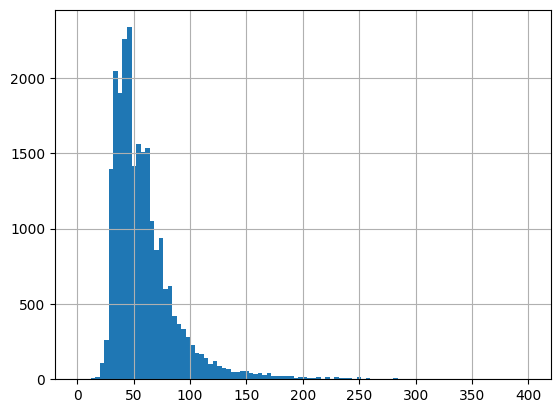

In [79]:
data['total_area'].hist(bins=100, range = (0, 400));

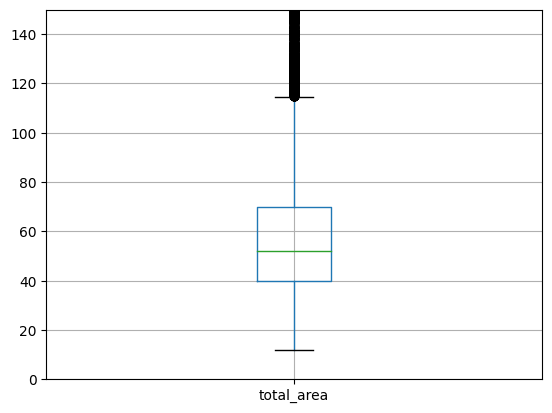

In [78]:
plt.ylim(0, 150)
data.boxplot('total_area');

In [19]:
data.query('total_area > 200').shape

(227, 28)

Большая часть значений от 40м до 70м - правдоподобно. Значения более 200м редкие и выбивающиеся. Будем удалять. 

<b>Жилая площадь 

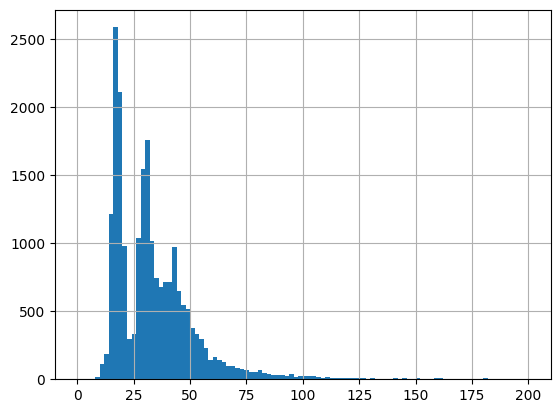

In [77]:
data['living_area'].hist(bins=100, range = (0, 200));

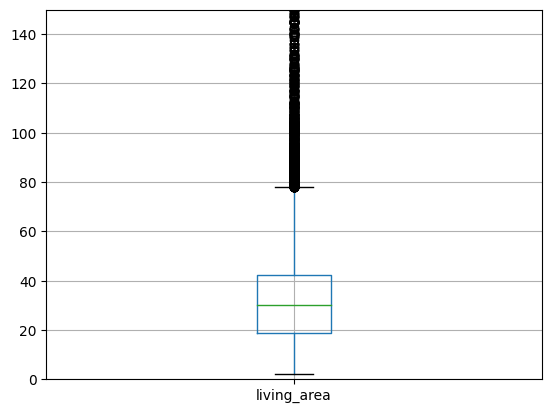

In [76]:
plt.ylim(0, 150)
data.boxplot('living_area');

In [22]:
data.query('living_area > 125').shape

(197, 28)

Большая часть значений от 19м до 42м - правдоподобно. Значения более 125м редкие и выбивающиеся. Будем удалять. 

<b>Площадь кухни.  

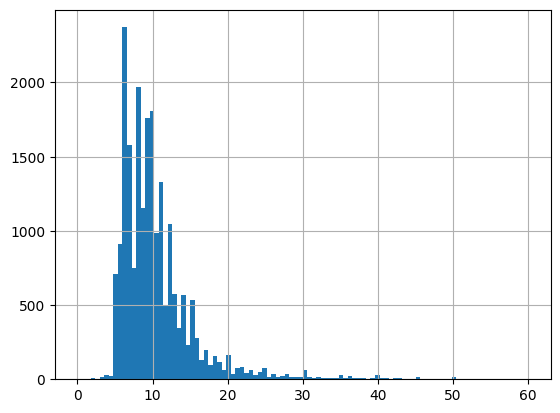

In [75]:
data['kitchen_area'].hist(bins=100, range = (0, 60));

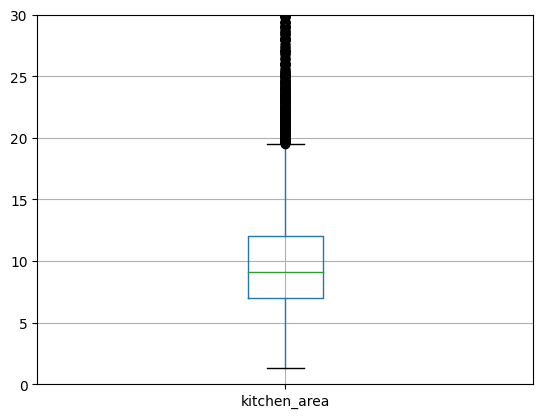

In [74]:
plt.ylim(0, 30)
data.boxplot('kitchen_area');

In [25]:
data.query('kitchen_area > 40').shape

(131, 28)

Большая часть значений от 7м до 12м - правдоподобно. Значения более 40м редкие и выбивающиеся. Будем удалять. 

<b>Цена объекта.

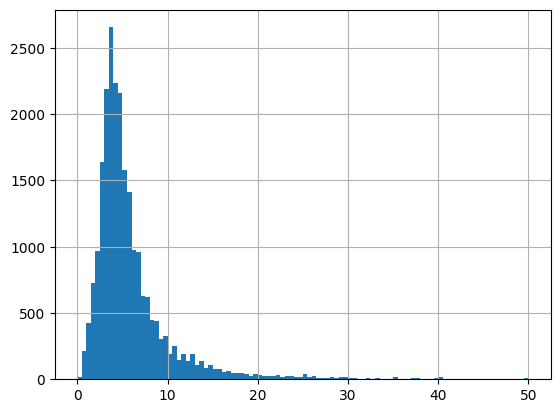

In [73]:
(data['last_price']/1000000).hist(bins=100, range = (0,50));

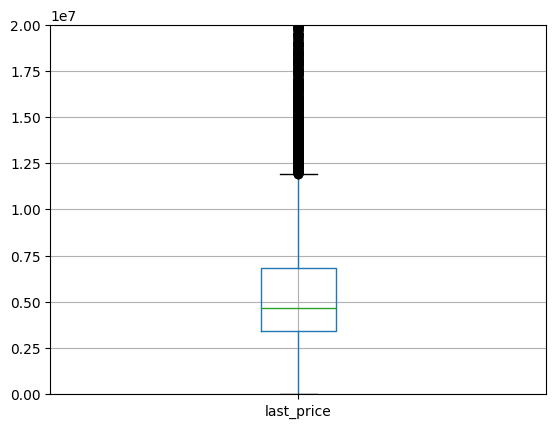

In [72]:
plt.ylim(0, 20000000)
data.boxplot('last_price');

In [28]:
data.query('last_price > 40000000').shape

(182, 28)

Большая часть значений от 3кк до 7кк - правдоподобно. Значения более 40кк редкие и выбивающиеся. Будем удалять. 

4.1.5 Количество комнат.

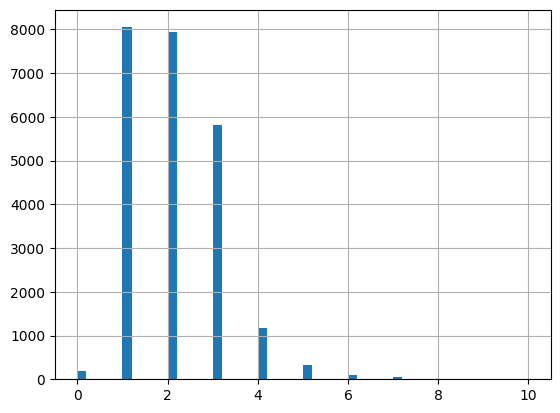

In [71]:
data['rooms'].hist(bins=50, range = (0, 10));

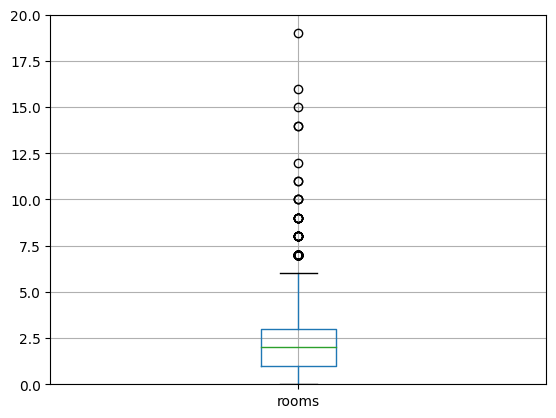

In [70]:
plt.ylim(0, 20)
data.boxplot('rooms');

In [31]:
data.query('rooms > 6').shape

(90, 28)

In [32]:
data.query('rooms == 0').shape

(197, 28)

In [33]:
data.query('rooms == 0'and'studio == True').shape

(149, 28)

Большая часть значений от 2 до 3 комнат - правдоподобно. Значение 0 связано с тем, что это студия. Причем около 50 квартир не указано, что это студя. Намек на мошенеческую деятельность. Значения более 6 редкие и выбивающиеся. Будем удалять. 

<b>Высота потолков

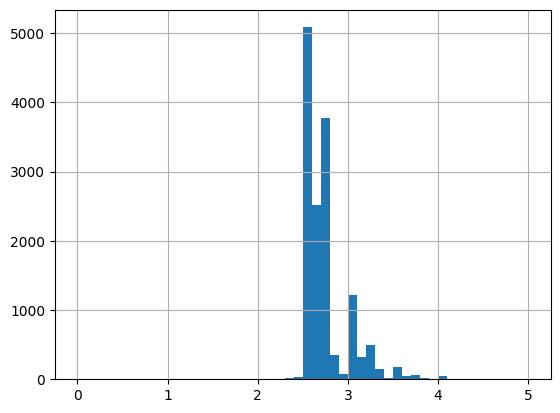

In [69]:
data['ceiling_height'].hist(bins=50, range = (0, 5));                                            

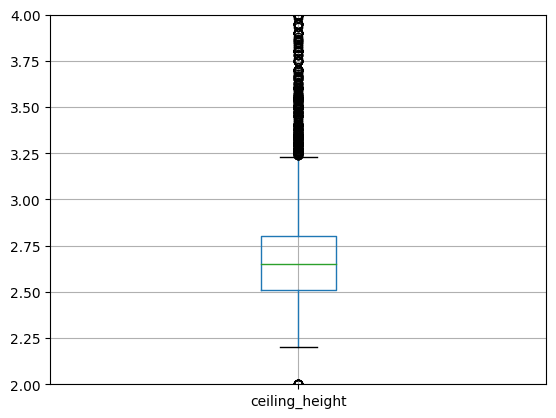

In [68]:
plt.ylim(2, 4)
data.boxplot('ceiling_height');

In [36]:
data.query('ceiling_height > 22')['ceiling_height']

355       25.0
3148      32.0
4643      25.0
4876      27.0
5076      24.0
5246      27.0
5669      26.0
5807      27.0
6246      25.0
9379      25.0
10773     27.0
11285     25.0
14382     25.0
17857     27.0
18545     25.0
20478     27.0
20507     22.6
21377     27.5
21824     27.0
22336     32.0
22869    100.0
22938     27.0
Name: ceiling_height, dtype: float64

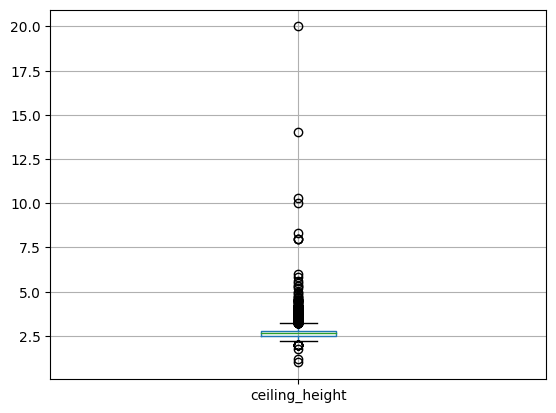

In [67]:
def ceiling_height_fix(fix):
    if fix > 22:
        return fix / 10
    return fix
data['ceiling_height'] = data['ceiling_height'].apply(ceiling_height_fix)
data.boxplot('ceiling_height');

Большая часть значений от 2,5м до 2,8м - правдоподобно. Значение больше 22 будем счтать опечаткой(неправильно поставлена запятая). Исправим делением на 10. Значения более 7 редкие и выбивающиеся и выбивающимеся, да и неправдоподобные. Будем удалять.

<b>Тип этажа квартиры («первый», «последний», «другой»).

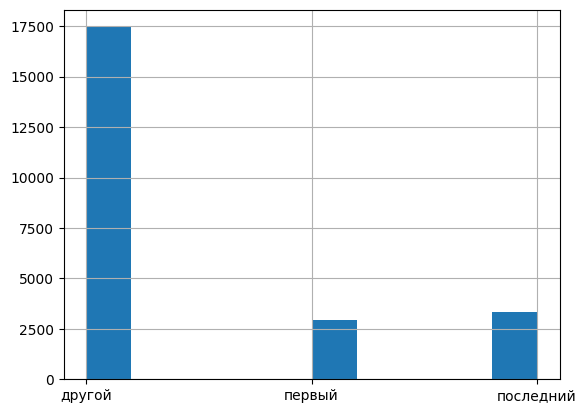

In [66]:
data['floor_type'].hist();

Значения правдоподобны.

<b>Общее количество этажей в доме.

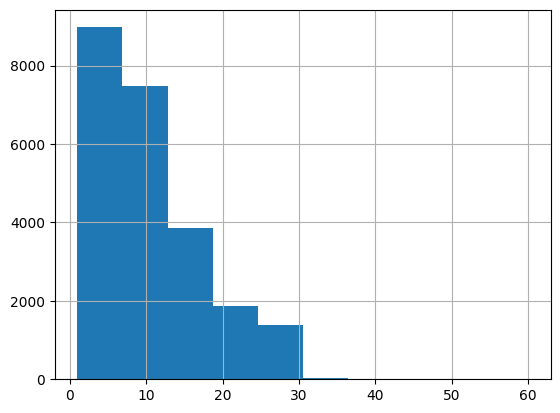

In [65]:
data['floors_total'].hist();

Значения правдоподобны.

<b>Расстояние до центра города в метрах.

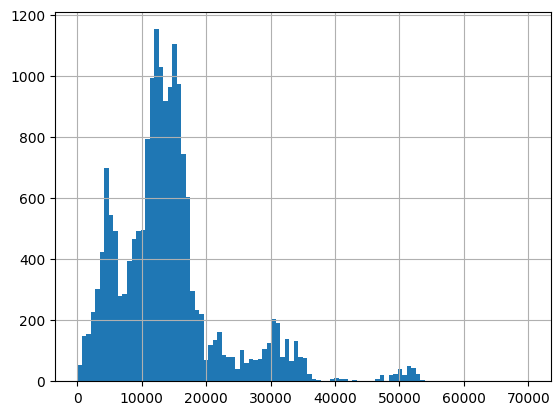

In [64]:
data['cityCenters_nearest'].hist(bins=100, range = (0, 70000));

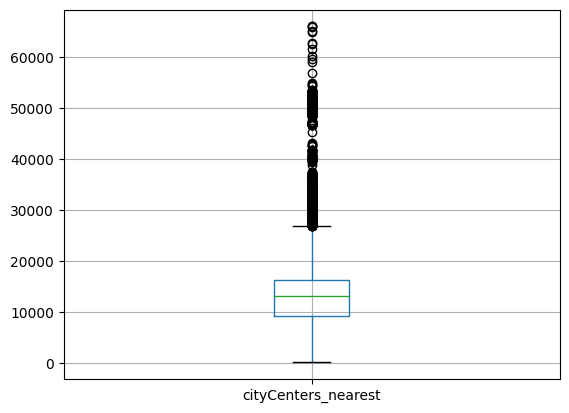

In [63]:
data.boxplot('cityCenters_nearest');

В таблице центр города - это центр СПб. Основная часть значений говорит о том что, недвижимость находится в самом Питере - до 15 км. Все что больше это города и населеные пункты лен области.

<b>Расстояние до ближайшего парка.

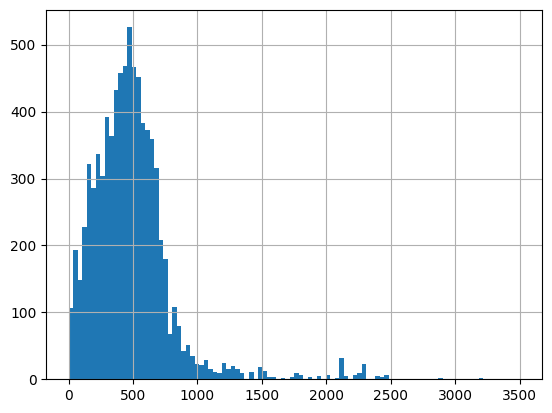

In [62]:
data['parks_nearest'].hist(bins=100, range = (0, 3500));

Если в радиусе 3,5км есть парк, то есть информация о нем.

In [43]:
data.shape


(23699, 28)

In [44]:
data_new = data[(data['total_area'] <= 200)]
data_new = data_new[(data_new['living_area'] <= 125) | (data_new['living_area'].isna())]
data_new = data_new[(data_new['kitchen_area'] <= 40) | (data_new['kitchen_area'].isna())]
data_new = data_new[(data_new['last_price'] <= 40000000)]
data_new = data_new[(data_new['rooms'] <= 6)]
data_new = data_new[(data_new['ceiling_height'] <= 7) | (data_new['ceiling_height'].isna())]
data_new.shape

(23251, 28)

### Изучите, как быстро продавались квартиры

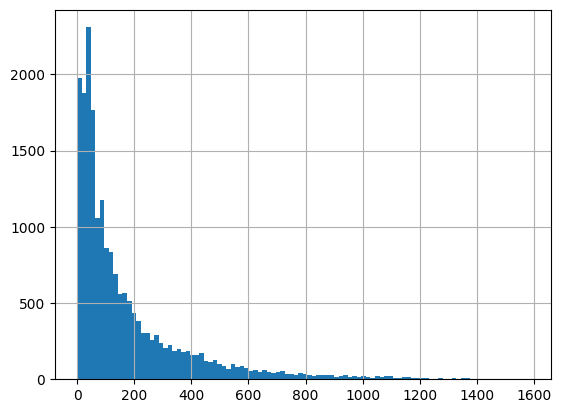

In [61]:
data_new['days_exposition'].hist(bins=100);

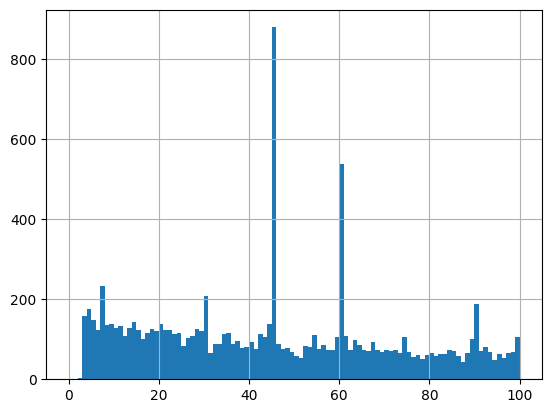

In [60]:
data_new['days_exposition'].hist(bins=100, range = (0, 100));

In [47]:
data_new['days_exposition'].describe()

count    20185.000000
mean       178.876245
std        217.413245
min          1.000000
25%         45.000000
50%         94.000000
75%        228.000000
max       1580.000000
Name: days_exposition, dtype: float64

Среднее значение - 178 дней. Медиана - 94 дней. Среднее почти в два раза больше медианы. Значит, в распределении есть длинный хвост с высокими значениями или несколько очень больших значений. Это влияет на среднее, но не на медиану. 

Обычно продажа занимает 94 дней. Менее 45 дней можно считать быстрой продажей, а более 228 дней долгой. 

### Какие факторы больше всего влияют на общую (полную) стоимость объекта?

Построим диаграммы рассеяния площадей (общей, жилой и кухни)

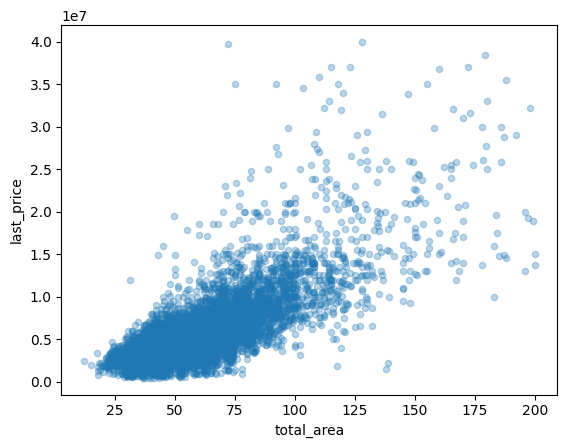

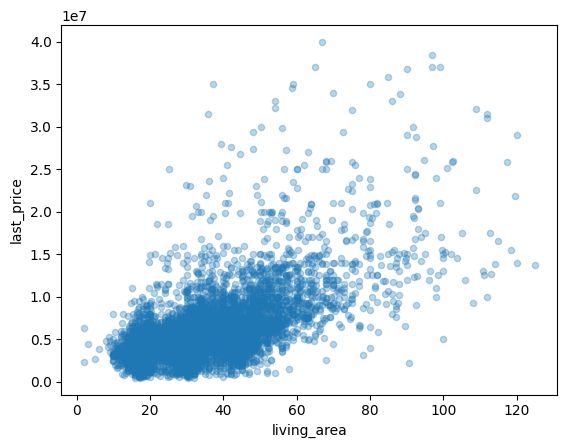

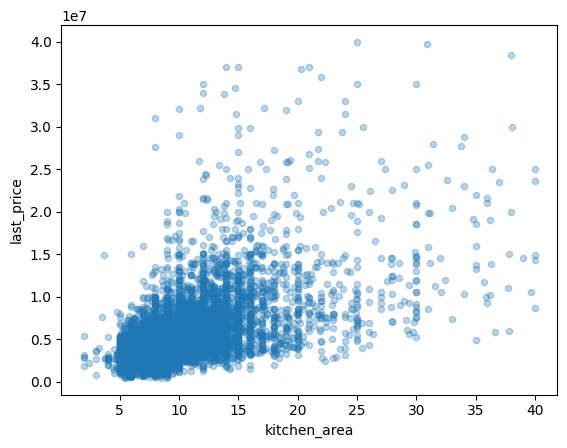

In [80]:
good_data = data_new.query('45 <= days_exposition <= 228')
good_data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.3)
good_data.plot(x='living_area', y='last_price', kind='scatter', alpha=0.3)
good_data.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.3);

Видим среднюю прямую зависимость цены от площади. Как зависомость больше пока не понятно. Станет ясно по коэфициенту корреляции.

С помощью сводных таблиц строим графики зависимости для остальных параметров.

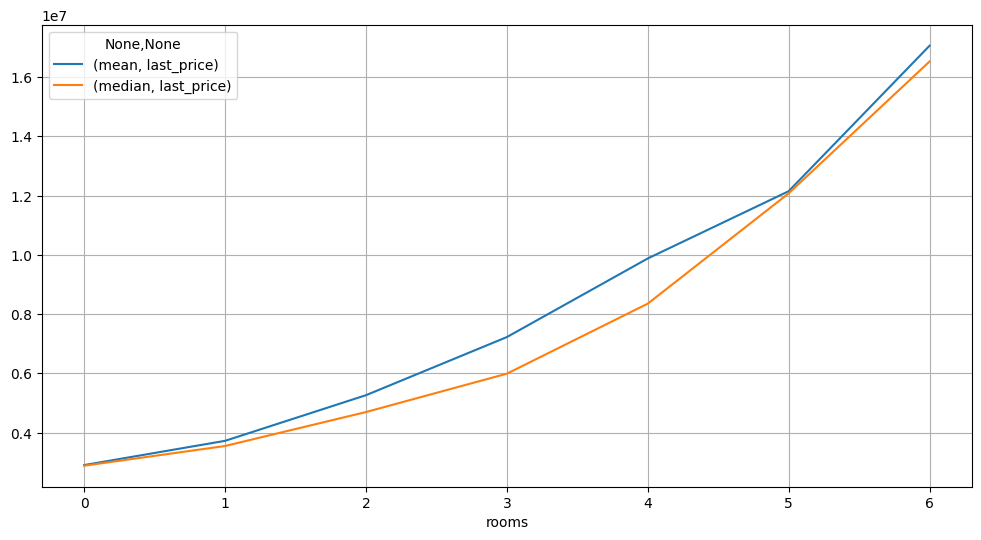

In [49]:
data_pivot_rooms = good_data.pivot_table(
    index=['rooms'], values='last_price', aggfunc=['mean', 'median']).plot(grid=True, figsize=(12, 6))

Вижу зависимость цены от количества комнат

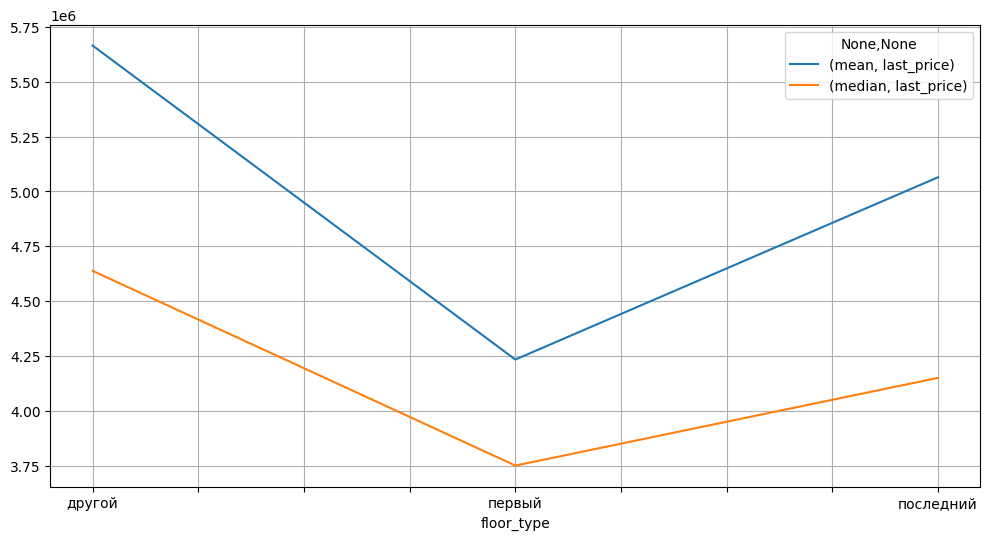

In [50]:
data_pivot_floor = good_data.pivot_table(
    index=['floor_type'], values='last_price', aggfunc=['mean', 'median']).plot(grid=True, figsize=(12, 6))

На этом графике видим, что цена первого и паследнего этажа ниже.

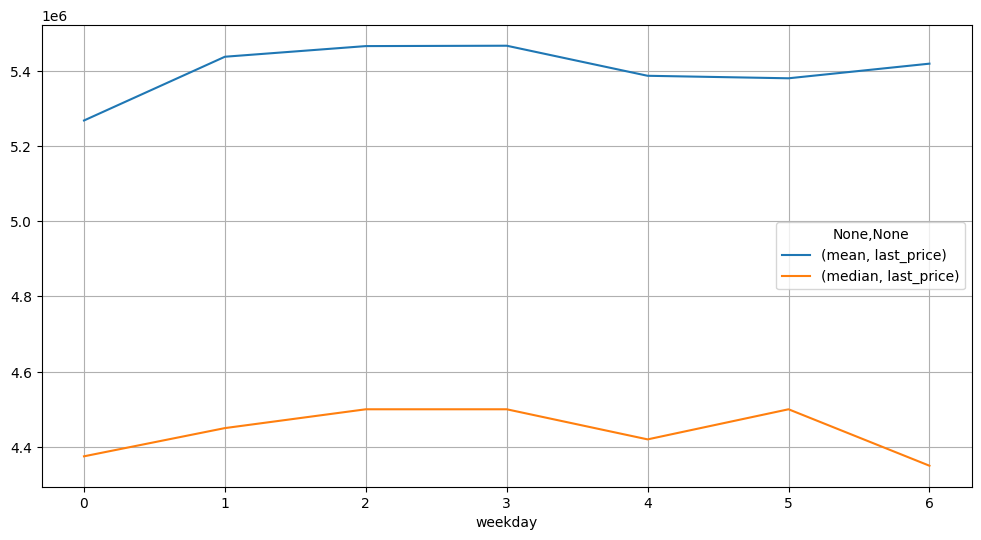

In [51]:
data_pivot_weekday = good_data.pivot_table(
    index=['weekday'], values='last_price', aggfunc=['mean', 'median']).plot(grid=True, figsize=(12, 6))

Зависимости от дня недели (как и ожидалось) я не вижу. Средние значения и медианы распределены равномерно.

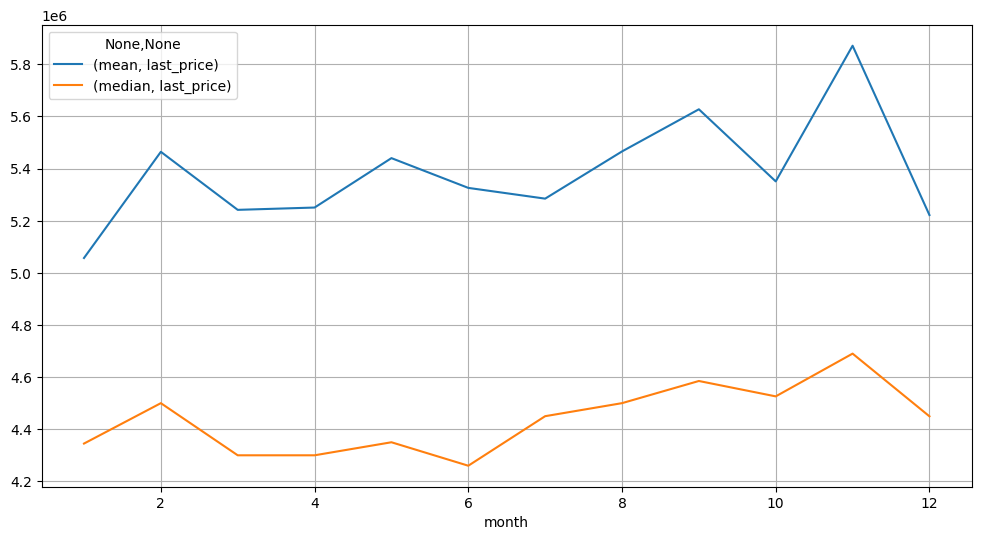

In [52]:
data_pivot_month = good_data.pivot_table(
    index=['month'], values='last_price', aggfunc=['mean', 'median']).plot(grid=True, figsize=(12, 6))

В средне цены на недвижимость в течении года немного поднимаются к ноябрю, потом падают. Видимо это сезонность на рынке недвижимости.

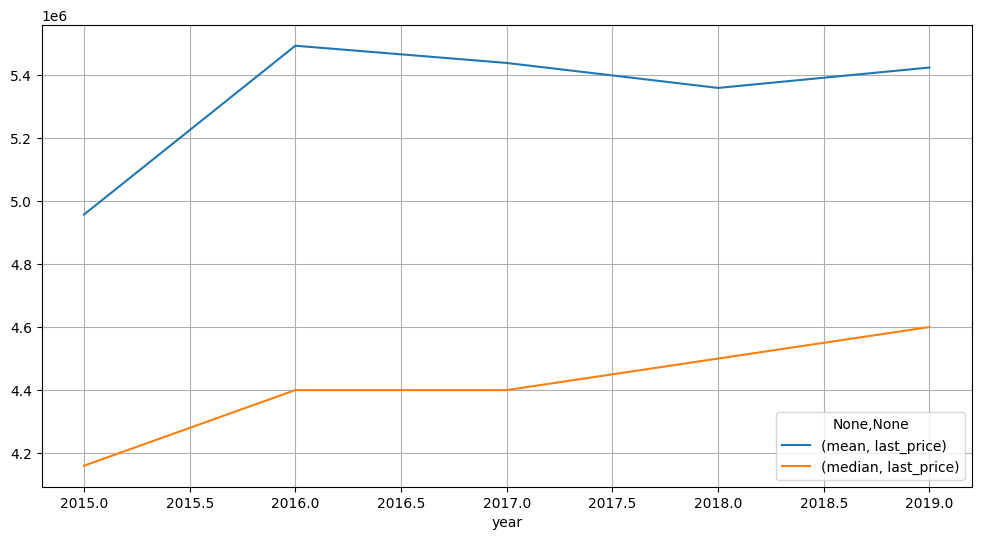

In [53]:
data_pivot_month = good_data.pivot_table(
    index=['year'], values='last_price', aggfunc=['mean', 'median']).plot(grid=True, figsize=(12, 6))

За пять лет цены на недвижимость в среднем поднялись.

In [54]:
print('Коэффициент корреляции общей площади:', good_data['total_area'].corr(good_data['last_price']))
print('Коэффициент корреляции жилой площади:', good_data['living_area'].corr(good_data['last_price']))
print('Коэффициент корреляции площади кухни:', good_data['kitchen_area'].corr(good_data['last_price']))
print('Коэффициент корреляции количества комнат:', good_data['rooms'].corr(good_data['last_price']))

Коэффициент корреляции общей площади: 0.7664419842709022
Коэффициент корреляции жилой площади: 0.6468874649417806
Коэффициент корреляции площади кухни: 0.5690023024157406
Коэффициент корреляции количества комнат: 0.4694156680481183


In [55]:
good_data[['total_area', 'living_area', 'kitchen_area', 'rooms']].corr()

,total_area,living_area,kitchen_area,rooms
total_area,1.000000,0.917018,0.533452,0.787383
living_area,0.917018,1.000000,0.278818,0.874947
kitchen_area,0.533452,0.278818,1.000000,0.151773
rooms,0.787383,0.874947,0.151773,1.000000


По коэффициенту корреляции можно судить, что зависимость параметра общей площади выше всего.

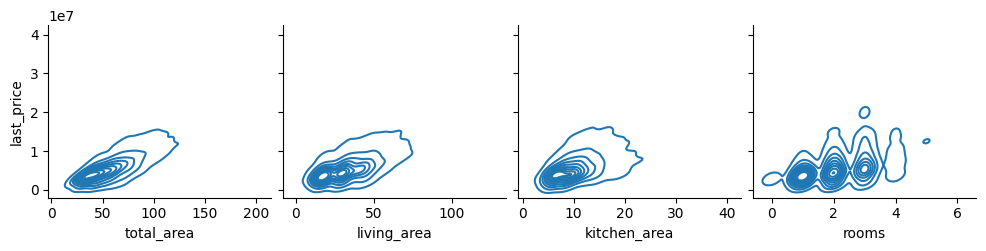

In [81]:
seaborn.pairplot(
    good_data,
    x_vars=['total_area', 'living_area', 'kitchen_area', 'rooms'],
    y_vars=['last_price'],
     kind="kde"
);

### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [57]:
top = good_data.pivot_table(index='locality_name_new', values='price_per_meter', aggfunc='count')
top['price_per_meter2'] = np.round(good_data.pivot_table(index='locality_name_new', values='price_per_meter'), decimals = 2)
top = top.rename(columns={'price_per_meter': 'Количество объявалений', 'price_per_meter2': 'Цена за кв.метр, руб'})
top = top.sort_values('Количество объявалений', ascending=False)
top.head(10)
top = top[top['Количество объявалений'] >= 116]
top

,Количество объявалений,"Цена за кв.метр, руб"
locality_name_new,,
Санкт-Петербург,6513,108969.03
нп. Мурино,283,85527.24
нп. Шушары,224,78722.92
Всеволожск,170,67610.59
Колпино,164,74419.52
нп. Парголово,158,88677.46
нп. Кудрово,145,92786.12
Пушкин,141,99112.67
Гатчина,140,66970.03


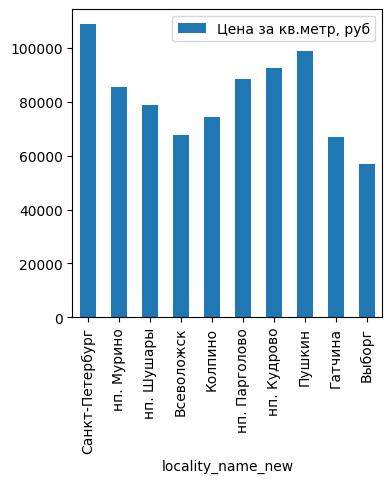

In [58]:
top.plot(y = 'Цена за кв.метр, руб', kind='bar', figsize=(4, 4));

Выполнил задание: Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений — постройте сводную таблицу с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов.

В Санкт-Петербурге самая высокая стоимость квадратного метра, а в Выборге самая низкая.

### Опишем, как стоимость объектов зависит от расстояния до центра города

,mean,median
,price_per_meter,price_per_meter
cityCenters_nearest,,
208.0,172619.05,172619.05
287.0,88796.30,88796.30
329.0,100000.00,100000.00
410.0,75471.70,75471.70
515.0,117283.95,117283.95
...,...,...
27313.0,193918.92,193918.92
27431.0,70312.50,70312.50


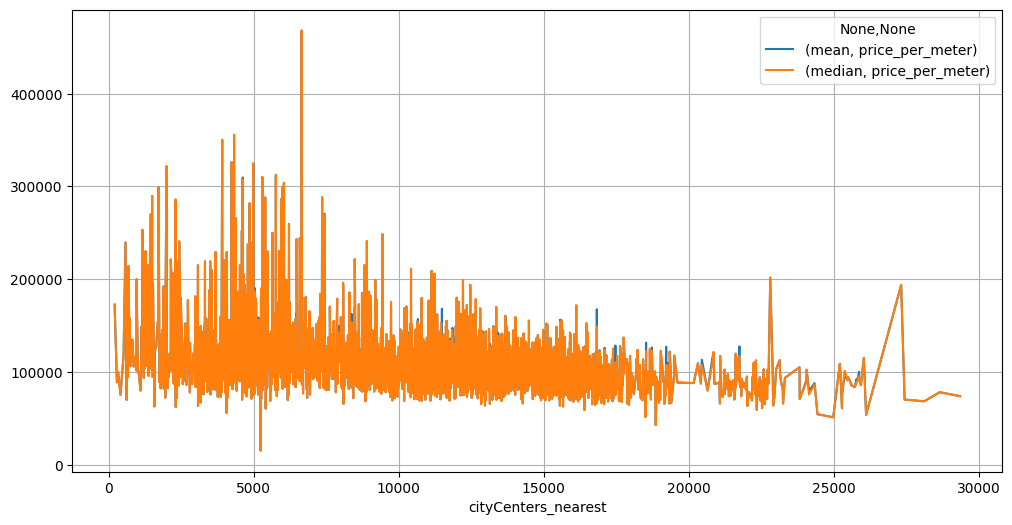

In [84]:
city_center_distance = good_data[good_data['locality_name'] == 'Санкт-Петербург']
city_center_distance = city_center_distance.pivot_table(index='cityCenters_nearest', values='price_per_meter', aggfunc=['mean', 'median'])
city_center_distance.plot(grid=True, figsize=(12, 6))
city_center_distance

Изучил перечисленные ниже параметры объектов и постройте отдельные гистограммы для каждого из этих параметров.

Общая площадь, жилая площадь, площадь кухни, цена объекта, количество комнат, высота потолков, тип этажа квартиры («первый», «последний», «другой»), общее количество этажей в доме, расстояние до центра города в метрах, расстояние до ближайшего парка.

Удалили выдающиеся значения. В итоге потеряли около 450 строк.

Под каждым графиком написал мои наблюдения по параметрам.

Изучил, как быстро продавались квартиры. Выделил 3 группы: быстрые продажи, долгие продажы и основная.

Выяснил какие факторы влияют на стоимость объекта. Построил графики зависимости и нашел коэффициент корреляции.

По коэффициенту корреляции можно судить, что зависимость параметра общей площади выше всего по сравнению с такими параметрами, как жилая площадь, площадь кухни и количество комнат.

Также можно заметить легкую зависимость от параметров этаж, месяц и год публикации.

Посчитал и отобразил в таблице стоимость квадтратного метра в разных населенных пунктах. В Санкт-Петербурге самая высокая стоимость квадратного метра, а в Выборге самая низкая.

Описал и отобразил на графике зависимость стоимости квадратного метра от расстояния до центра в Санкт-Петербурге. Стоимость объектов с увилечением расстояния от центра уменьшается. Но в самом центре много жилья с низкой стоимостью, а на окраинах часто встречаются жилье с высокой стоимостью.

## Общий вывод

Я выполнил предобработку данных. Изучил пропуски данных, по возможности их востоновил. Изучил типы данных. Приобразовал значения в столбце first_day_exposition в понятные для Python даты и для экономии памяти в столбце is_apartment преобразовал в булевые значения. В столбце locality_name устранил неявные дубликаты - это связано с формой населенного пункта. Добавил необходимые для дальнейшего исследования столбцы. 

Установил аномальные значение. Часть данных, касающихся высоты потолка востоновил. Остольное удалил, чтобы не было искажений информации. 

Провел исследовательский анализ данных. Были изучены основные факторы, которые могут влиять на стоимостиь объекта.

Основным влияющим фактором является общая площадь объекта. 

Далее влияют зависимые от него же факторы площадь жилая и кухни. 

Также слудует отметить такие факторы: количество комнат, на каком этаже квартира, месяц и год публикации. 

Есть зависимость от того в каком населенном пункте находится объект. В Санкт-Петербурге самая высокая стоимость квадратного метра, а в Выборге низкая. 

Есть зависимость стоимости квадратного метра от расстояния до центра в Санкт-Петербурге. Стоимость объектов с увилечением расстояния от центра уменьшается. Но в самом центре много жилья с низкой стоимостью, а на окраинах города часто встречаются жилье с высокой стоимостью.